<a href="https://colab.research.google.com/github/piiop/prophet-challenge/blob/main/Module_8_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Install the required libraries
!pip install prophet

In [34]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-35-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [36]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: xlabel='Date'>

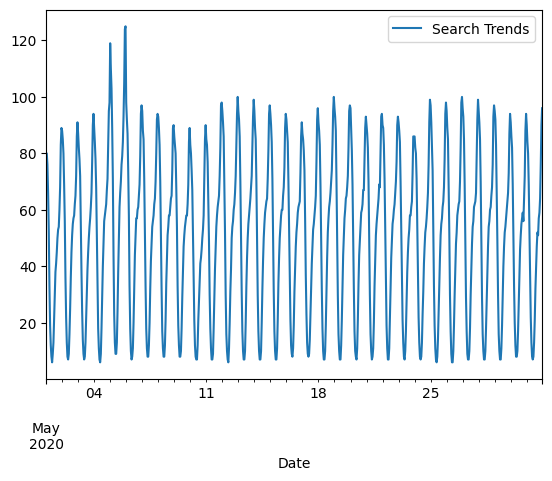

In [37]:
# Slice the DataFrame to just the month of May 2020
may_2020 = df_mercado_trends.loc['2020-05-01':'2020-05-31']

# Plot to visualize the data for May 2020
may_2020.plot()

In [38]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = may_2020.sum()


# View the traffic_may_2020 value
traffic_may_2020

Search Trends    38181
dtype: int64

In [39]:
# Calcluate the monthly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year,
                           df_mercado_trends.index.month]).sum().median()

# View the median_monthly_traffic value
median_monthly_traffic

Search Trends    35172.5
dtype: float64

In [40]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

Search Trends    1.085536
dtype: float64

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** There was an increase of 8.55% over the median monthly traffic in the month of May. More information is needed to determine the significance of that increase.

<Axes: xlabel='Date'>

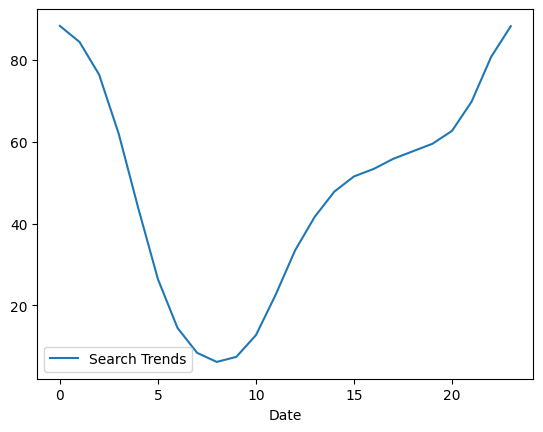

In [41]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
df_mercado_trends.groupby(df_mercado_trends.index.hour).mean().plot()

<Axes: xlabel='day'>

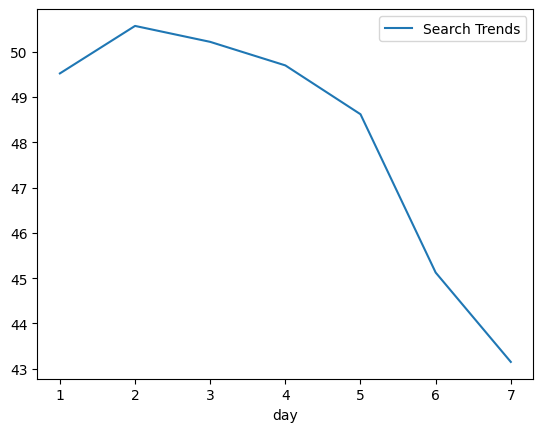

In [42]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day).mean().plot()

<Axes: xlabel='week'>

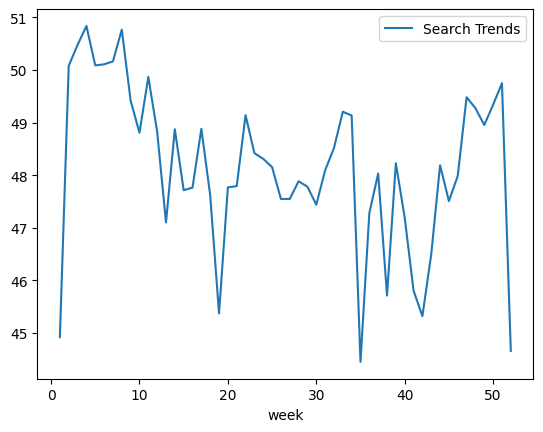

In [43]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean().plot()


**Question:** Are there any time based trends that you can see in the data?

**Answer:** On the hourly graph, we can see that search traffic bottoms out around 6 a.m. and increases throughout the day, reaching a peak near midnight. On the daily graph, we can see that search traffic is highest on Tuesday and drops significantly on the weekends. And finally on the weekly graph there are some sharp peaks and drops with might be associated with seasonality like holidays or earnings reports.

In [44]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

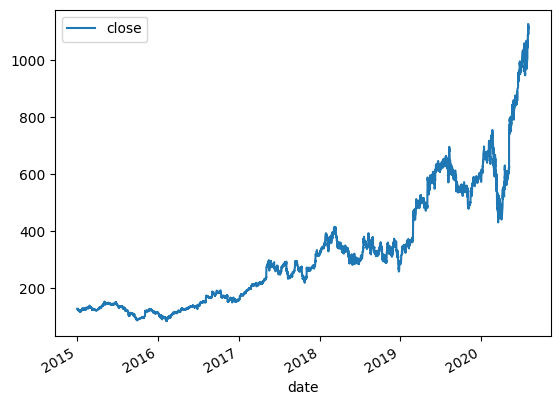

In [45]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot()

In [46]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna(thresh=2)

# View the first and last five rows of the DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())


,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


In [47]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
mercado_stock_trends_2020 = mercado_stock_trends_df.loc['2020-01-01':'2020-06-30']

# View the first and last five rows of first_half_2020 DataFrame
display(mercado_stock_trends_2020.head())
display(mercado_stock_trends_2020.tail())

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


array([<Axes: >, <Axes: >], dtype=object)

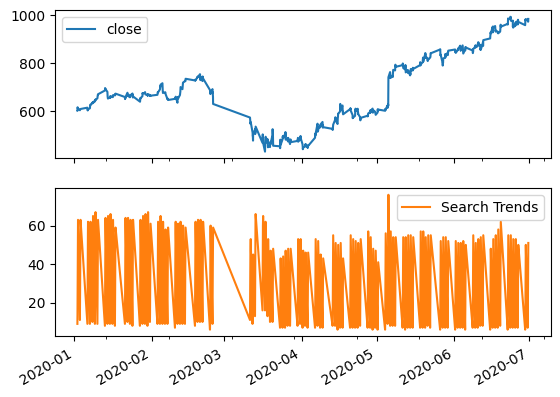

In [48]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
mercado_stock_trends_2020.plot(subplots=True)

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Both time series show a sharp noticable drop starting around March of 2020. Close prices show a recovery and growth to new highs while search trends recover to about the pre March 2020 levels - including a spike to a high value. This would be consistent with the narrative.

In [49]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1)



In [50]:
# Creating a "Returns" column to calculate volatility
mercado_stock_trends_df['Returns'] = mercado_stock_trends_df['close'].pct_change()

# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['Returns'].rolling(window=4).std()


<Axes: >

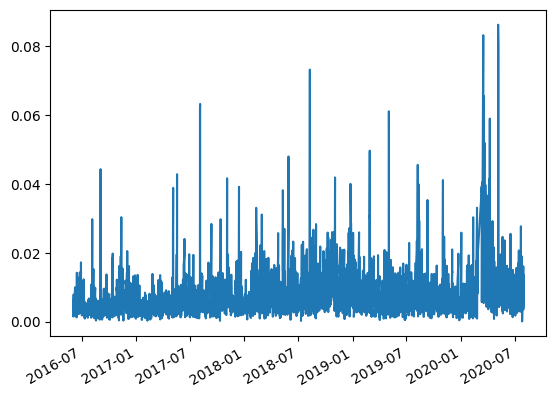

In [51]:
# Visualize the stock volatility
mercado_stock_trends_df['Stock Volatility'].plot()

In [52]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df.loc[:, 'Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()

In [53]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

,close,Search Trends,Lagged Search Trends,Returns,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,0.010876,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,-0.000512,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,-0.001025,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,-0.002346,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Returns,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.006380,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,-0.016147,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.007239,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013552,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.010678,0.013566,0.010678


In [54]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** No, there is a very weak negative correlation between Lagged Search Traffic and Stock Volatility, and no correlation between Lagged Search Traffic and Returns.

In [55]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
df_mercado_trends = df_mercado_trends.rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop an NaN values from the prophet_df DataFrame
df_mercado_trends = df_mercado_trends.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [56]:
# Call the Prophet function, store as an object
model = Prophet()

In [57]:
# Fit the time-series model.
model.fit(df_mercado_trends)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hrvzic3/voln_ite.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0hrvzic3/ye32djib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49015', 'data', 'file=/tmp/tmp0hrvzic3/voln_ite.json', 'init=/tmp/tmp0hrvzic3/ye32djib.json', 'output', 'file=/tmp/tmp0hrvzic3/prophet_modelo0hwyh0m/prophet_model-20240711194129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:41:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [59]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.469500,81.130931,98.391203,44.469500,44.469500,45.159722,45.159722,45.159722,41.452703,...,1.860594,1.860594,1.860594,1.846426,1.846426,1.846426,0.0,0.0,0.0,89.629222
1,2016-06-01 01:00:00,44.470406,77.265820,94.873877,44.470406,44.470406,41.605529,41.605529,41.605529,37.943556,...,1.810498,1.810498,1.810498,1.851474,1.851474,1.851474,0.0,0.0,0.0,86.075935
2,2016-06-01 02:00:00,44.471312,67.423606,84.143172,44.471312,44.471312,31.282049,31.282049,31.282049,27.656646,...,1.768912,1.768912,1.768912,1.856491,1.856491,1.856491,0.0,0.0,0.0,75.753361
3,2016-06-01 03:00:00,44.472218,52.393790,69.330172,44.472218,44.472218,16.014826,16.014826,16.014826,12.417424,...,1.735926,1.735926,1.735926,1.861476,1.861476,1.861476,0.0,0.0,0.0,60.487045
4,2016-06-01 04:00:00,44.473124,35.423019,50.758453,44.473124,44.473124,-1.100073,-1.100073,-1.100073,-4.677999,...,1.711496,1.711496,1.711496,1.866430,1.866430,1.866430,0.0,0.0,0.0,43.373051


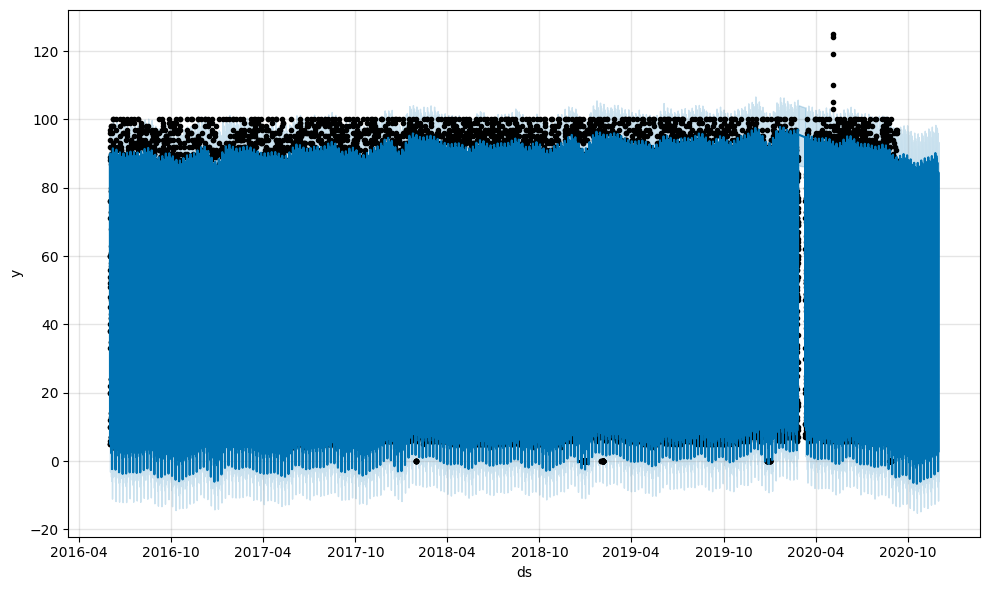

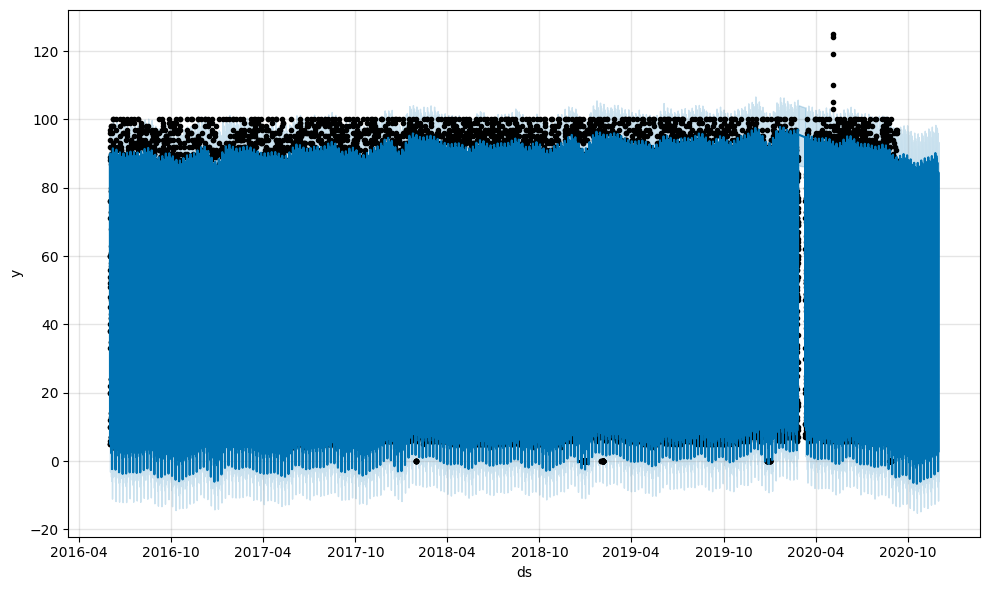

In [60]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_mercado_trends)

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** The near-term forecase looks to be recovering from a low point with positive growth.

In [61]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.130931,98.391203
2016-06-01 01:00:00,86.075935,77.265820,94.873877
2016-06-01 02:00:00,75.753361,67.423606,84.143172
2016-06-01 03:00:00,60.487045,52.393790,69.330172
2016-06-01 04:00:00,43.373051,35.423019,50.758453


<Axes: xlabel='ds'>

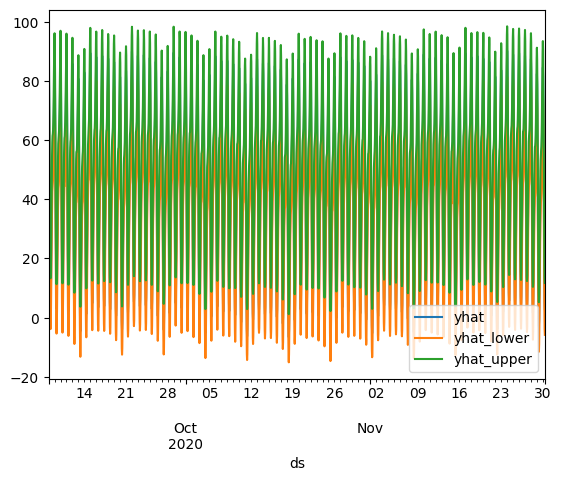

In [62]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].tail(2000).plot()

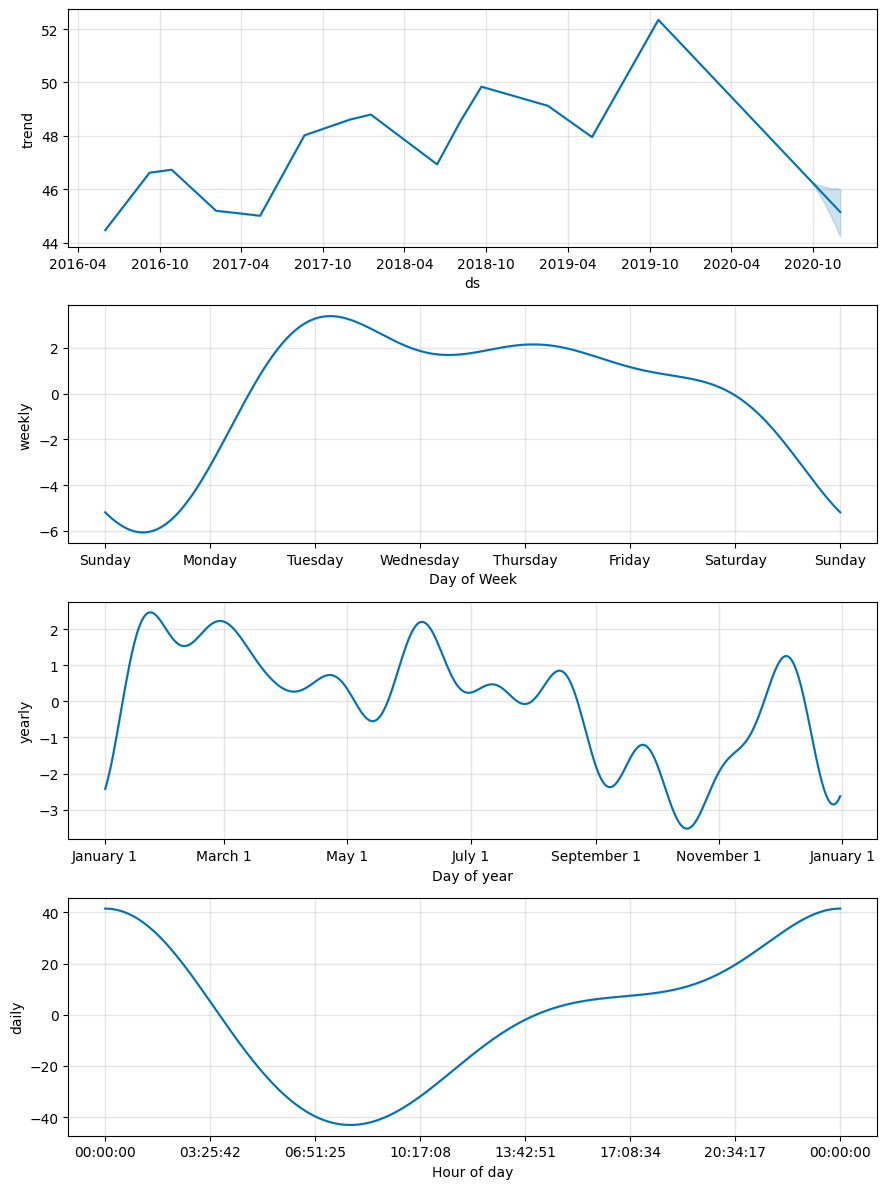

In [63]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
fig = model.plot_components(forecast_mercado_trends)
plt.show()

**Question:** What time of day exhibits the greatest popularity?

**Answer:** Midnight (00:00)

**Question:** Which day of week gets the most search traffic?
   
**Answer:** Tuesday

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** Using only the visualization we can see it's about halfway thru October. Checking with a bit of code we find it's exactly Oct 15.

In [64]:
# Extract the yearly seasonality
yearly_seasonality = forecast_mercado_trends[['ds', 'yearly']]

# Convert ds to day of year
yearly_seasonality['day_of_year'] = yearly_seasonality['ds'].dt.dayofyear

# Group by day of year and take the mean (in case there are multiple years in the forecast)
yearly_average = yearly_seasonality.groupby('day_of_year')['yearly'].mean().reset_index()

# Find the day with the lowest trend
lowest_day = yearly_average.loc[yearly_average['yearly'].idxmin()]

print(f"The lowest trend occurs on day {lowest_day['day_of_year']} of the year")
print(f"This corresponds to approximately {pd.Timestamp(2020, 1, 1) + pd.Timedelta(days=int(lowest_day['day_of_year'])-1):%B %d}")

The lowest trend occurs on day 289.0 of the year
This corresponds to approximately October 15


<ipython-input-64-044d9dae044f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_seasonality['day_of_year'] = yearly_seasonality['ds'].dt.dayofyear
